In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
from sklearn.feature_selection import SelectKBest, chi2


def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, model = None):

    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    if model == 'svm':
      _, ax = plt.subplots(1,1)
      ax.set_xscale('log')

      for idx, val in enumerate(grid_param_2):
          ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

      ax.set_title("Grid Search Scores")
      ax.set_xlabel(name_param_1)
      ax.set_ylabel('CV Average Score')
      ax.legend(loc="best")
      ax.grid('on')

    else:

      _, ax = plt.subplots(1,1)

      for idx, val in enumerate(grid_param_2):
          ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

      ax.set_title("Grid Search Scores")
      ax.set_xlabel(name_param_1)
      ax.set_ylabel('CV Average Score')
      ax.legend(loc="best")
      ax.grid('on')

In [45]:
uploaded = files.upload()
df = pd.read_csv('Heart_disease_details.csv')
df.info()

Saving Heart_disease_details.csv to Heart_disease_details (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 n

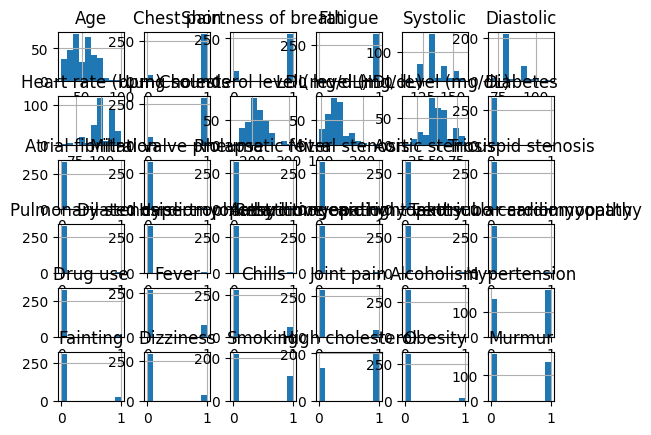

In [46]:
df.describe()

df.hist()
plt.show()

In [47]:
features = ['Name','Gender', 'Echocardiogram', 'Blood culture', 'EKG', 'Cardiac CT',
            'Chest x-ray', 'Previous illnesses', 'Pulmonary function tests', 'Spirometry', 
            'Diagnosis', 'Medications', 'Treatment']

for i in features:
  labelEncoder = LabelEncoder()
  df[i] = labelEncoder.fit_transform(df[i])


etiqueta = input('Ingrese el vector que desea usar como etiqueta o None si dese que sea Diagnosis: ')  

if etiqueta == 'None':
  y = df['Diagnosis']
  X = df.drop(['Diagnosis'], axis = 1)
else:
  y = df[etiqueta]
  X = df.drop([etiqueta], axis = 1)

name = input('Ingrese 0 si no desea eliminar el nombre o 1 si desea eliminarlo: ')

if etiqueta == '0':
  X = df
else:
  X = X.drop(['Name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ingrese el vector que desea usar como etiqueta o None si dese que sea Diagnosis: None
Ingrese 0 si no desea eliminar el nombre o 1 si desea eliminarlo: 0


In [48]:
escalado = MinMaxScaler()

escalado.fit(X_train)
X_train = escalado.transform(X_train)
X_test = escalado.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


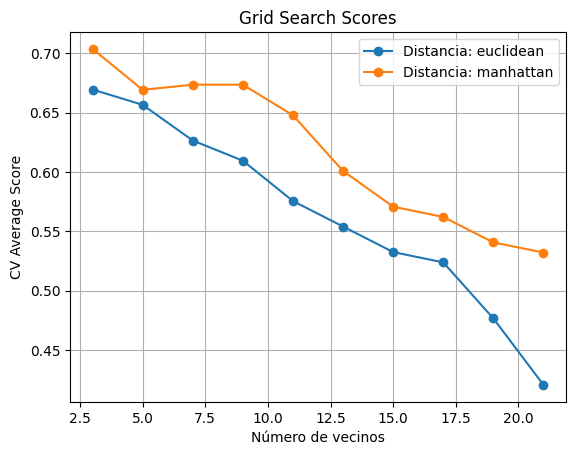

In [49]:
KNN = KNeighborsClassifier()
parameters = {'n_neighbors':(3, 5, 7, 9, 11, 13, 15, 17, 19, 21), 
              'metric':('euclidean', 'manhattan')}

clf = GridSearchCV(KNN, 
                   parameters,
                   scoring = 'accuracy',
                   cv = 5,
                   return_train_score =  True)
clf.fit(X_train, y_train)

plot_grid_search(clf.cv_results_, [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                 ['euclidean', 'manhattan'],
                 'Número de vecinos', 'Distancia')

In [50]:
y_pred = clf.predict(X_test)
print('El accuracy del KNN en el conjunto de test es de ' + str(accuracy_score(y_test, y_pred)))
print('Los mejores parametros fueron: ')
print(clf.best_params_)

El accuracy del KNN en el conjunto de test es de 0.6435643564356436
Los mejores parametros fueron: 
{'metric': 'manhattan', 'n_neighbors': 3}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


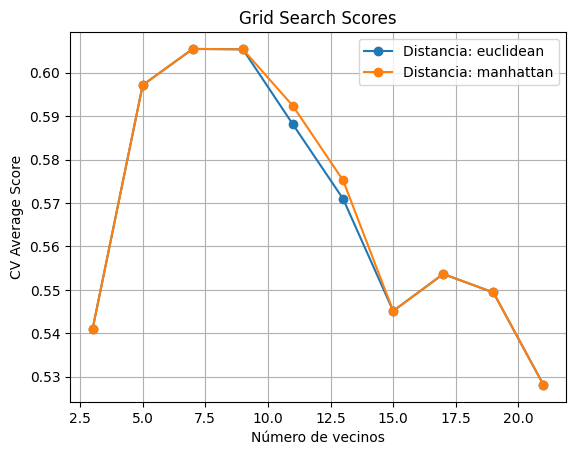

In [51]:
selector = SelectKBest(chi2, k=20)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

KNN = KNeighborsClassifier()
parameters = {'n_neighbors':(3, 5, 7, 9, 11, 13, 15, 17, 19, 21), 
              'metric':('euclidean', 'manhattan')}

clf = GridSearchCV(KNN, 
                   parameters,
                   scoring = 'accuracy',
                   cv = 5,
                   return_train_score =  True)
clf.fit(X_train, y_train)

plot_grid_search(clf.cv_results_, [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                 ['euclidean', 'manhattan'],
                 'Número de vecinos', 'Distancia')